In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests
import pandas as pd
from StringIO import StringIO

In [3]:
base_url = 'http://localhost:8088/api/local/local'
# base_url = 'http://localhost:8088/api/candYgene/queries'


# Step by step

First we need to build the full URL of the API endpoint we want to call

In [4]:
query_url = base_url + '/countFeaturesSGN'
print 'API endpoint URL: ' + query_url

API endpoint URL: http://localhost:8088/api/local/local/countFeaturesSGN


We set the heared to `text/csv` so the SPARQL endpoint will return data in csv format

In [5]:
headers = {"Accept": "text/csv"}

We setup any API parameters and send them with our request

In [6]:
params = { "graph": "http://solgenomics.net/genome/Solanum_pennellii" }
resp = requests.get(query_url, headers=headers,  params=params)

Assuming that our request was successfull, the response should contain data in csv format

In [7]:
print resp.text

"feature_name","feature_id","n"
"exon","[SO:0000147](http://purl.obolibrary.org/obo/SO_0000147)",278874
"CDS","[SO:0000316](http://purl.obolibrary.org/obo/SO_0000316)",252950
"intron","[SO:0000188](http://purl.obolibrary.org/obo/SO_0000188)",204027
"protein_coding_primary_transcript","[SO:0000120](http://purl.obolibrary.org/obo/SO_0000120)",48923
"protein_coding_gene","[SO:0001217](http://purl.obolibrary.org/obo/SO_0001217)",44965
"genetic_marker","[SO:0001645](http://purl.obolibrary.org/obo/SO_0001645)",2225
"chromosome","[SO:0000340](http://purl.obolibrary.org/obo/SO_0000340)",13
"genome","[SO:0001026](http://purl.obolibrary.org/obo/SO_0001026)",1



We can then use Pandas to convert csv data into a DataFrame

In [8]:
df = pd.read_csv(StringIO(resp.text))
df

,feature_name,feature_id,n
0,exon,[SO:0000147](http://purl.obolibrary.org/obo/SO...,278874
1,CDS,[SO:0000316](http://purl.obolibrary.org/obo/SO...,252950
2,intron,[SO:0000188](http://purl.obolibrary.org/obo/SO...,204027
3,protein_coding_primary_transcript,[SO:0000120](http://purl.obolibrary.org/obo/SO...,48923
4,protein_coding_gene,[SO:0001217](http://purl.obolibrary.org/obo/SO...,44965
5,genetic_marker,[SO:0001645](http://purl.obolibrary.org/obo/SO...,2225
6,chromosome,[SO:0000340](http://purl.obolibrary.org/obo/SO...,13
7,genome,[SO:0001026](http://purl.obolibrary.org/obo/SO...,1


We can then manipulate the DataFrame to visualize our results

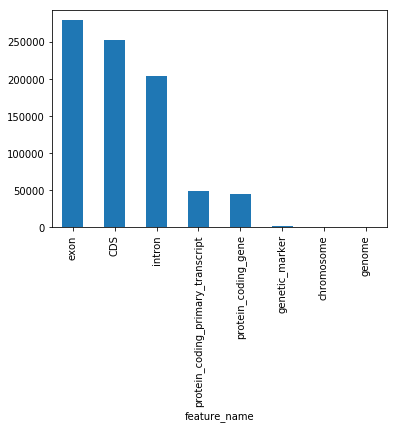

In [9]:
df = df.set_index('feature_name')
df['n'].plot(kind='bar')

# Packaging things up
We can package the API call in a simple function

In [10]:
def callAPI(query, params={}):
    headers = {"Accept": "text/csv"}
    query_url = base_url + query
    
    resp = requests.get(query_url, headers=headers,  params=params)
    # boldly assuming response was code 200
    df = pd.read_csv(StringIO(resp.text))
    return df

# Ready to roll
It now becomes really easy to perform all of the above in a few lines of Python

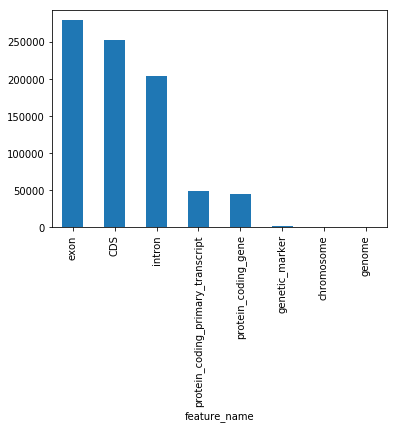

In [11]:
params = { "graph": "http://solgenomics.net/genome/Solanum_pennellii" }
df = callAPI('/countFeaturesSGN', params=params)
df = df.set_index('feature_name')
df['n'].plot(kind='bar');

# Widgets

In [12]:
import ipywidgets as widgets
from ipywidgets import interact

In [13]:
def plotFeatures(graph):
    '''Plot result of `countFeaturesSGN` for the given graph'''
    plt.figure()
    params = { "graph": graph }
    df = callAPI('/countFeaturesSGN', params=params)
    df = df.set_index('feature_name')
    df['n'].plot(kind='bar')
    plt.title('Features for ' + graph)
    plt.show();

In [14]:
so_ly = 'http://solgenomics.net/genome/Solanum_lycopersicum'
so_pe = 'http://solgenomics.net/genome/Solanum_pennellii'
pe_ly = 'http://plants.ensembl.org/Solanum_lycopersicum'

interact(plotFeatures, graph=[ so_ly, so_pe, pe_ly ]);

In [15]:
def countTriples(text):
    params = { "text": text }
    df = callAPI('/countTriples', params=params)
    print 'Counting triples for ' + text
    print df


In [16]:
interact(countTriples, text='fruit');